In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker


In [2]:
def set_plot_params():
    """
    Sets default plotting options.
    Args:
        None
    Returns:
        None
    """
    sns.set_style("whitegrid", {"grid.linestyle": "--"})

    params = {
        "legend.fontsize": "large",
        "figure.figsize": (16, 6),
        "axes.labelsize": "large",
        "axes.labelweight": "bold",
        "axes.labelpad": 10.0,
        "axes.titlesize": "xx-large",
        "axes.titleweight": "bold",
        "axes.titlepad": 15.0,
        "xtick.labelsize": "large",
        "ytick.labelsize": "large",
    }

    plt.rcParams.update(params)
    return

set_plot_params()

In [3]:
ccrb_path = Path.cwd() / 'data' / 'allegations_202007271729.csv'
ccrb_raw = pd.read_csv(ccrb_path)

In [4]:
ccrb_raw.head()

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)


In [5]:
ccrb_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33358 entries, 0 to 33357
Data columns (total 27 columns):
unique_mos_id               33358 non-null int64
first_name                  33358 non-null object
last_name                   33358 non-null object
command_now                 33358 non-null object
shield_no                   33358 non-null int64
complaint_id                33358 non-null int64
month_received              33358 non-null int64
year_received               33358 non-null int64
month_closed                33358 non-null int64
year_closed                 33358 non-null int64
command_at_incident         31814 non-null object
rank_abbrev_incident        33358 non-null object
rank_abbrev_now             33358 non-null object
rank_now                    33358 non-null object
rank_incident               33358 non-null object
mos_ethnicity               33358 non-null object
mos_gender                  33358 non-null object
mos_age_incident            33358 non-null int64

In [6]:
def glue_date(df, dest_col, input_year_col, input_month_col):
    df = df.copy()
    df[dest_col] = pd.to_datetime(
        ccrb_raw[input_year_col].astype(str)
        + "/"
        + ccrb_raw[input_month_col].astype(str)
        + "/01"
    )
    return df


def compute_days_to_close(df, start_col, end_col):
    df = df.copy()
    df["days_to_close"] = df.apply(
        lambda x: (x[end_col] - x[start_col]) / np.timedelta64(1, "D"), axis=1,
    ).round(2)
    return df


ccrb_raw = glue_date(ccrb_raw, "date_received", "year_received", "month_received")
ccrb_raw = glue_date(ccrb_raw, "date_closed", "year_closed", "month_closed")
ccrb_raw = compute_days_to_close(ccrb_raw, "date_received", "date_closed")
ccrb_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33358 entries, 0 to 33357
Data columns (total 30 columns):
unique_mos_id               33358 non-null int64
first_name                  33358 non-null object
last_name                   33358 non-null object
command_now                 33358 non-null object
shield_no                   33358 non-null int64
complaint_id                33358 non-null int64
month_received              33358 non-null int64
year_received               33358 non-null int64
month_closed                33358 non-null int64
year_closed                 33358 non-null int64
command_at_incident         31814 non-null object
rank_abbrev_incident        33358 non-null object
rank_abbrev_now             33358 non-null object
rank_now                    33358 non-null object
rank_incident               33358 non-null object
mos_ethnicity               33358 non-null object
mos_gender                  33358 non-null object
mos_age_incident            33358 non-null int64

In [7]:
cond_gend = ccrb_raw["complainant_gender"].isin([
    "Female",
    "Male",
    "Transman (FTM)",
    "Transwoman (MTF)",
])

ccrb = ccrb_raw[cond_gend]

In [17]:
ccrb['fado_type'].value_counts()

Abuse of Authority    17365
Force                  6834
Discourtesy            4251
Offensive Language      654
Name: fado_type, dtype: int64

Physical force                   4783
Word                             3845
Stop                             2262
Search (of person)               2008
Frisk                            1863
                                 ... 
Questioned immigration status       1
Punch/Kick                          1
Gun pointed                         1
Threat of Arrest                    1
Gun Fired                           1
Name: allegation, Length: 82, dtype: int64

/Users/james/anaconda3/envs/BPIO/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution of Days to Close'), (0.0, 2000.0)]

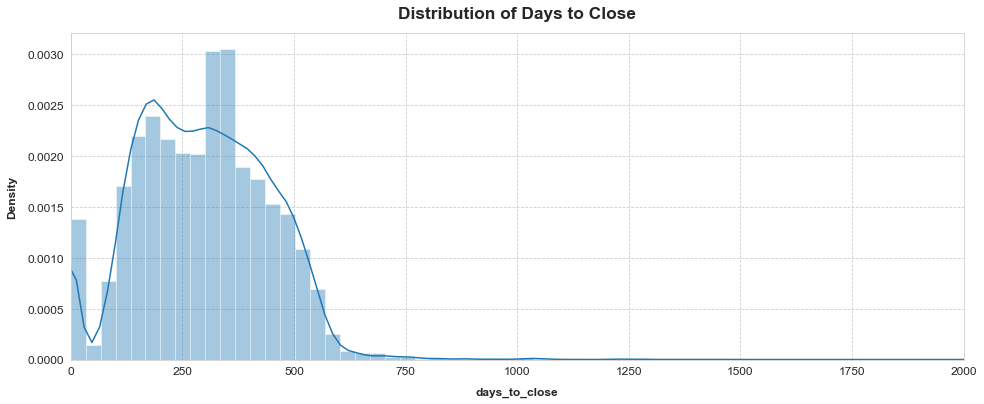

In [8]:
ax = sns.distplot(ccrb_raw["days_to_close"], bins=100)

ax.set(title="Distribution of Days to Close", xlim=[0, 2_000])

<AxesSubplot:xlabel='complainant_gender', ylabel='days_to_close'>

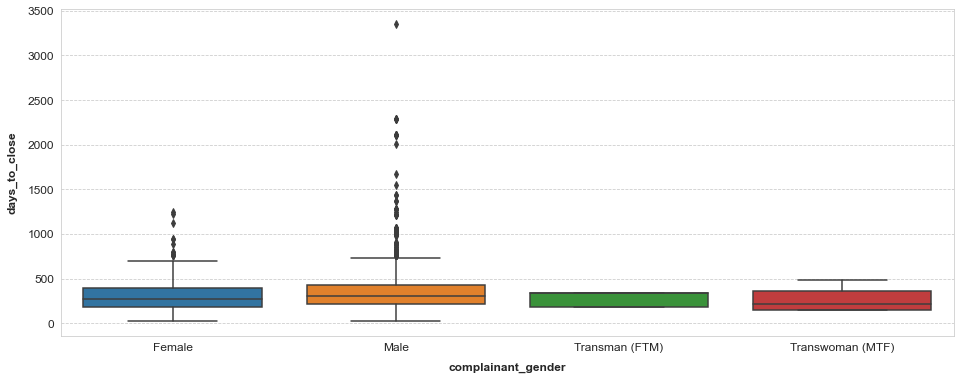

In [9]:
sns.boxplot(data=ccrb, x="complainant_gender", y="days_to_close")

[Text(0.5, 1.0, 'Time to Close Complaint by Ethnicity of Complainant'),
 (0.0, 1500.0)]

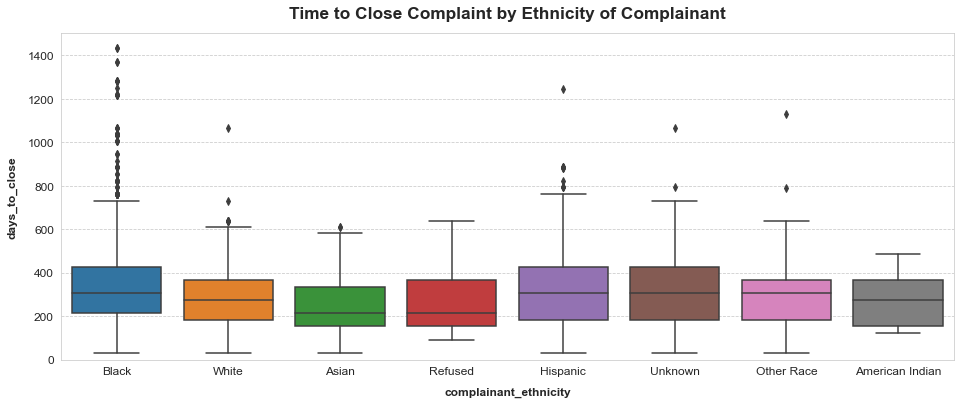

In [12]:
ax = sns.boxplot(data=ccrb, x="complainant_ethnicity", y="days_to_close")

ax.set(title="Time to Close Complaint by Ethnicity of Complainant", ylim=(0, 1_500))

[Text(0.5, 1.0, 'Time to Close Complaint by Top-Level Offense Type'),
 (0.0, 1500.0)]

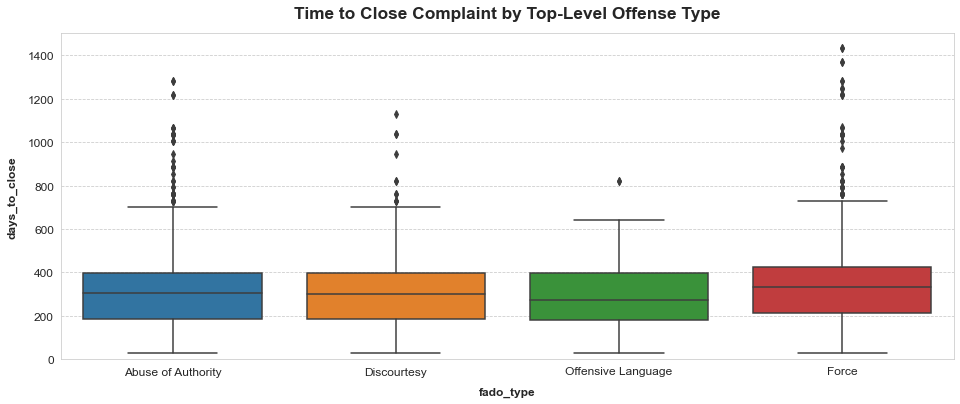

In [20]:
ax = sns.boxplot(data=ccrb, x="fado_type", y="days_to_close")

ax.set(title="Time to Close Complaint by Top-Level Offense Type", ylim=(0, 1_500))

[Text(0.5, 1.0, 'Time to Close Complaint by Ethnicity of Complainant'),
 (0.0, 1500.0),
 (0.0, 100.0)]

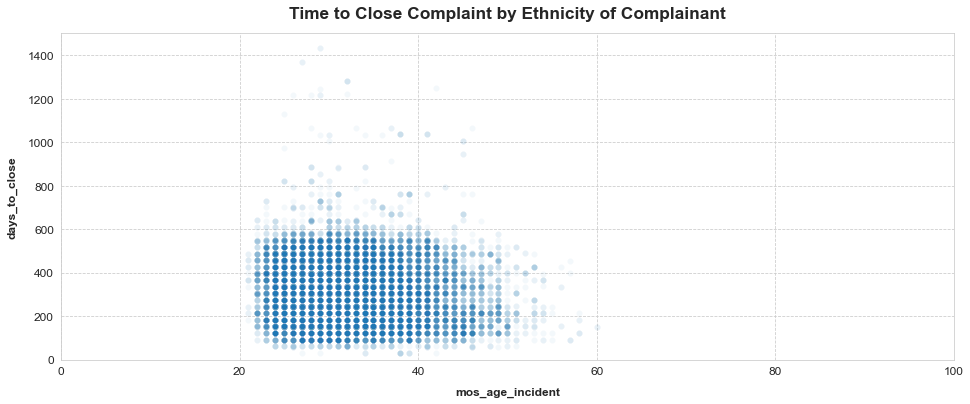

In [24]:
ax = sns.scatterplot(data=ccrb, x="mos_age_incident", y="days_to_close", alpha=.05)

ax.set(title="Time to Close Complaint by Ethnicity of Complainant", ylim=(0, 1_500), xlim =(0,100))

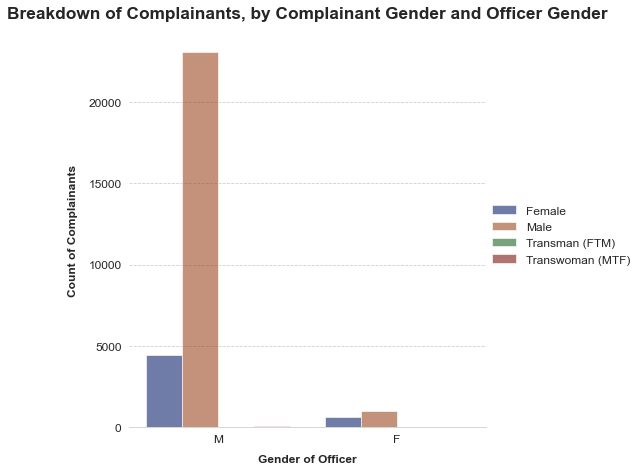

In [27]:
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=ccrb, kind="count",
    x="mos_gender", hue="complainant_gender",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set(title="Breakdown of Complainants, by Complainant Gender and Officer Gender")
g.set_axis_labels("Gender of Officer", "Count of Complainants")
g.legend.set_title("")